<h1><center><font color='Purple'> Machine Learning - Signature Detection </font></center></h1>
<h1><center><font color='Purple'> Group No : 271 </font></center></h1>
<h1><center><font color='Purple'> S Sumalatha | Kulkarni Nishant Mohanrao | R A Bharat </font></center></h1>

In [2]:
#Read Files 
import sys 
import pandas as pd
import seaborn as sns 
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

<b><font color='blue'> Common function definition </font></b>

In [3]:
def conf_matrix(act, pred):
    mat = np.zeros((2,2))
    mat[0][0] = np.sum([pred[i]==act[i] and act[i]==1 for i in range(len(act))]).astype(int)
    mat[1][1] = np.sum([pred[i]==act[i] and act[i]==0 for i in range(len(act))]).astype(int)
    mat[0][1] = np.sum([pred[i]!=act[i] and act[i]==0 for i in range(len(act))]).astype(int)
    mat[1][0] = np.sum([pred[i]!=act[i] and act[i]==1 for i in range(len(act))]).astype(int)
    return mat


def sigmoid(z):
    return (1+np.exp(-z))**(-1)

def cost_func(theta, X, Y):
    
    h = sigmoid(np.dot(X, theta))
    N = len(X)
    pred_1 = Y*np.log(h)
    pred_0 = (1-Y)*np.log(1-h)
    J = -(pred_0+pred_1)/N
    return J

def grad_descent(X, Y, a=0.04, epochs=5000):
    
    theta = np.random.rand(X.shape[1])
    N = len(X)
    J = [cost_func(theta, X, Y)]
    
    for i in range(epochs):
        y_cap = sigmoid(np.dot(X, theta))
        theta -= a * np.dot(X.T, (y_cap - Y))/N
        J.append(cost_func(theta, X, Y))
    return J, theta

def predict(X, theta):
    
    z = np.dot(X, theta)
    p = [round(i) for i in sigmoid(z)]
    return p

<b><center><font color='Blue'>1. Data Visualization and Exploration </font></center></b>

<b1><font color='Blue'> 1. Print 2 rows for sanity check to identify all the features present in the dataset 
and if the target matches with them.
EDA and Running statistics on the dataset </font></b1>

In [4]:
signature_df = pd.read_csv('Signature.csv')
print("Features of Signature file ")
signature_df.head()

Features of Signature file 


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [5]:
#Statistical Description of the data 
start_time=datetime.now()
print(signature_df.describe())
# Getting Max distance 
print("\n")
later_time=datetime.now()
difference = later_time - start_time
print("End Time",datetime.now(),"\nTime Taken to read ", str(difference))


           duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  22544.000000  2.254400e+04  2.254400e+04  22544.000000    22544.000000   
mean     218.859076  1.039545e+04  2.056019e+03      0.000311        0.008428   
std     1407.176612  4.727864e+05  2.121930e+04      0.017619        0.142599   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  5.400000e+01  4.600000e+01      0.000000        0.000000   
75%        0.000000  2.870000e+02  6.010000e+02      0.000000        0.000000   
max    57715.000000  6.282565e+07  1.345927e+06      1.000000        3.000000   

             urgent           hot  num_failed_logins     logged_in  \
count  22544.000000  22544.000000       22544.000000  22544.000000   
mean       0.000710      0.105394           0.021647      0.442202   
std        0.036473      0.928428           0.150328      0.

<b1> <font color='blue'>  Unique values in dataset </font></b1>

In [6]:
#check for unique values 
start_time=datetime.now()
print("Unique DataFrame values :\n",signature_df.nunique(),"\n")
print("Unique Protocol type values :",signature_df['protocol_type'].nunique())
later_time=datetime.now()
difference = later_time - start_time
print("End Time",datetime.now(),"\nTime Taken to read ", str(difference))

Unique DataFrame values :
 duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate                  93
same_srv_rate                    75
d

<b1><font color='Blue'> 2. Comment on class imbalance with appropriate visualization method </font></b1>

Class imbalance occurs when observation in one class is higher than the observation in other classes. In the given dataset, we can see that the observations fall under two classes - Normal and Anomaly. From the below visualisation we can see that 57% of the data represents the class Anomaly and only 43% of the data represents the class Normal. This could potentially result in the model being biased. 

<AxesSubplot:ylabel='service'>

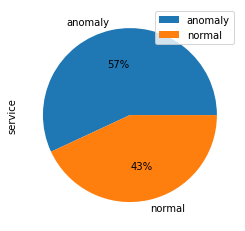

In [7]:
signature_df.groupby(["class"]).count().plot(kind='pie', y="service", autopct='%1.0f%%')

<b1><font color='Blue'> 3. Provide appropriate visualizations to get an insight about the dataset </font></b1>

Text(0.5, 1.0, 'Network Signature')

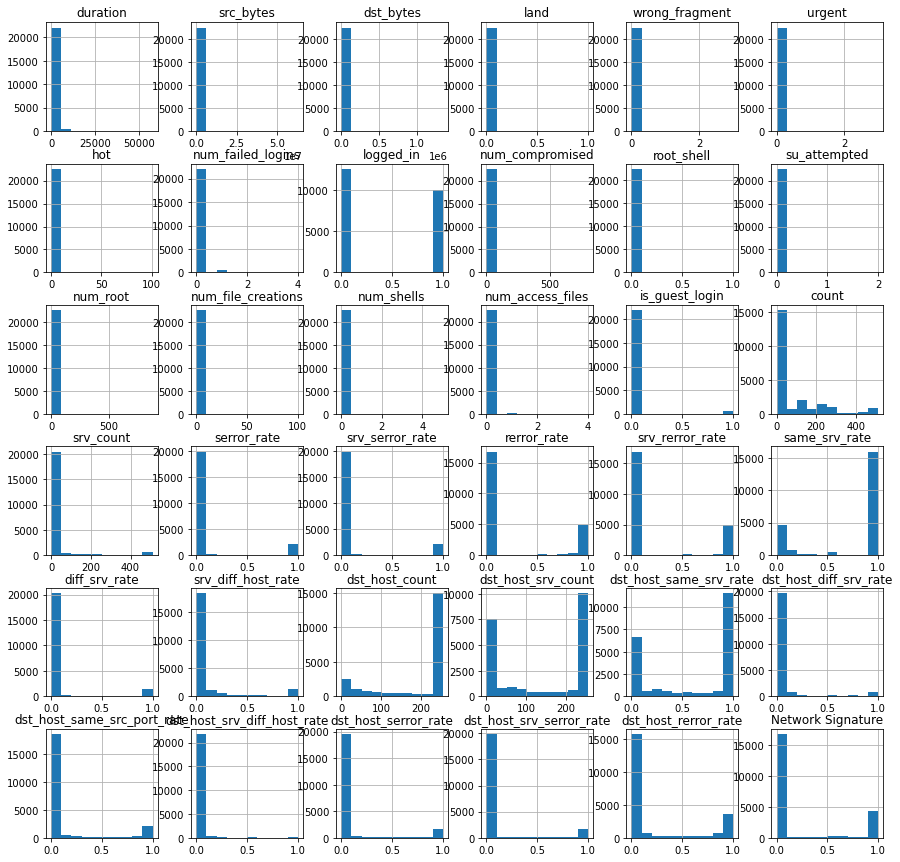

In [12]:
signature_df.hist(figsize=(15,15))
plt.title("Network Signature")

<AxesSubplot:xlabel='class', ylabel='num_compromised'>

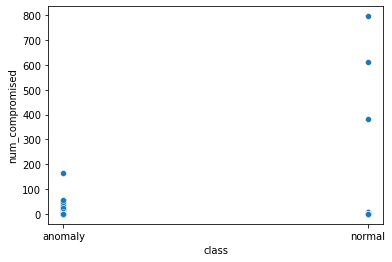

In [13]:
start_time=datetime.now()
sns.scatterplot(data=signature_df,x=signature_df["class"],y=signature_df["num_compromised"])

<AxesSubplot:xlabel='flag', ylabel='class'>

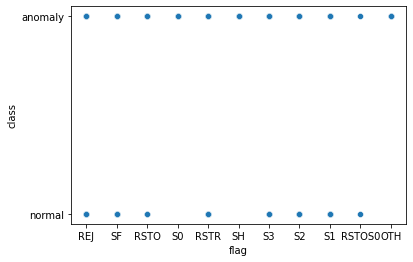

In [14]:
start_time=datetime.now()
sns.scatterplot(data=signature_df,x=signature_df["flag"],y=signature_df["class"])

End Time 2022-06-23 22:54:28.869985 
Time Taken to read  0:00:00.037777


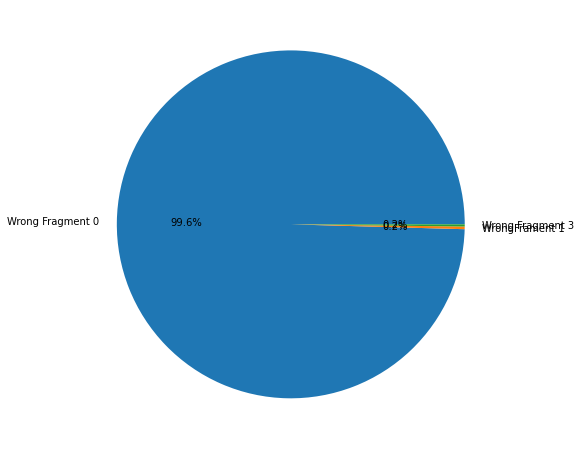

In [15]:
# representing wrong fragement feature wrt class 

import matplotlib.pyplot as plt
import numpy as np
start_time=datetime.now()
fig=plt.figure(figsize=(15,8))
fragment=['Wrong Fragment 0','WrongFrament 1','Wrong Fragment 3 ']
fragmentlist = np.where(signature_df['wrong_fragment'] == 0, "Wrong Fragment 0", "Wrong Fragment 1")
fragmentcount = signature_df.groupby('wrong_fragment').count()
plt.pie(fragmentcount['class'],labels=fragment,autopct='%1.1f%%')
later_time=datetime.now()
difference = later_time - start_time
print("End Time",datetime.now(),"\nTime Taken to read ", str(difference))


protocol_type
icmp     1043
tcp     18880
udp      2621
Name: class, dtype: int64


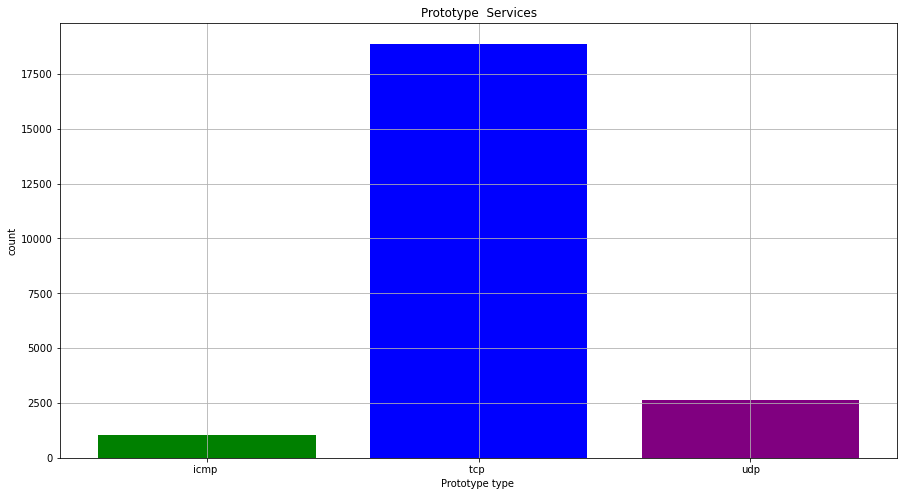

In [16]:
# representing Tiers services taken 
start_time=datetime.now()

fig=plt.figure(figsize=(15,8))
tcpval=['icmp ','tcp ','udp']
tcpcount = signature_df.groupby('protocol_type').count()
tcpcounttemp=tcpcount['class']
print(tcpcounttemp)
New_Colors = ['green','blue','purple']
plt.bar(tcpval,tcpcounttemp,color=New_Colors)
plt.title('Prototype  Services')
plt.xlabel('Prototype type ')
plt.ylabel('count')
plt.grid(True)
plt.show()

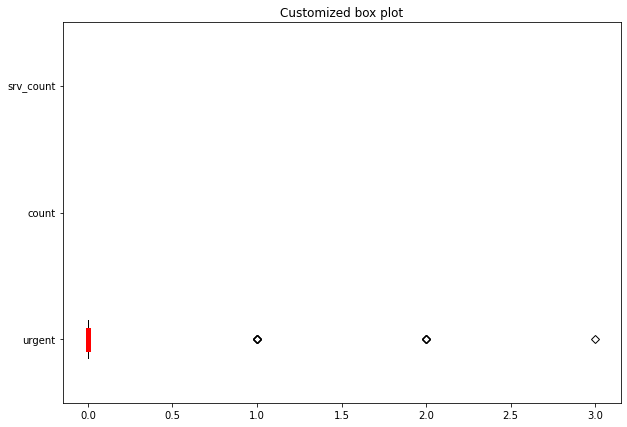

In [17]:
# Creating dataset
np.random.seed(10)

#urgent=[signature_df['urgent']]
urgent=signature_df['urgent']
count=signature_df['count']
srv_count=signature_df['srv_count']

data=[urgent,count,srv_count]

 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 5)
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 5)
 # changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 1)
     
# x-axis labels
ax.set_yticklabels(['urgent','count','srv_count'])
 
# Adding title
plt.title("Customized box plot")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()

ax.get_yaxis().tick_left()
     
# show plot
plt.show()

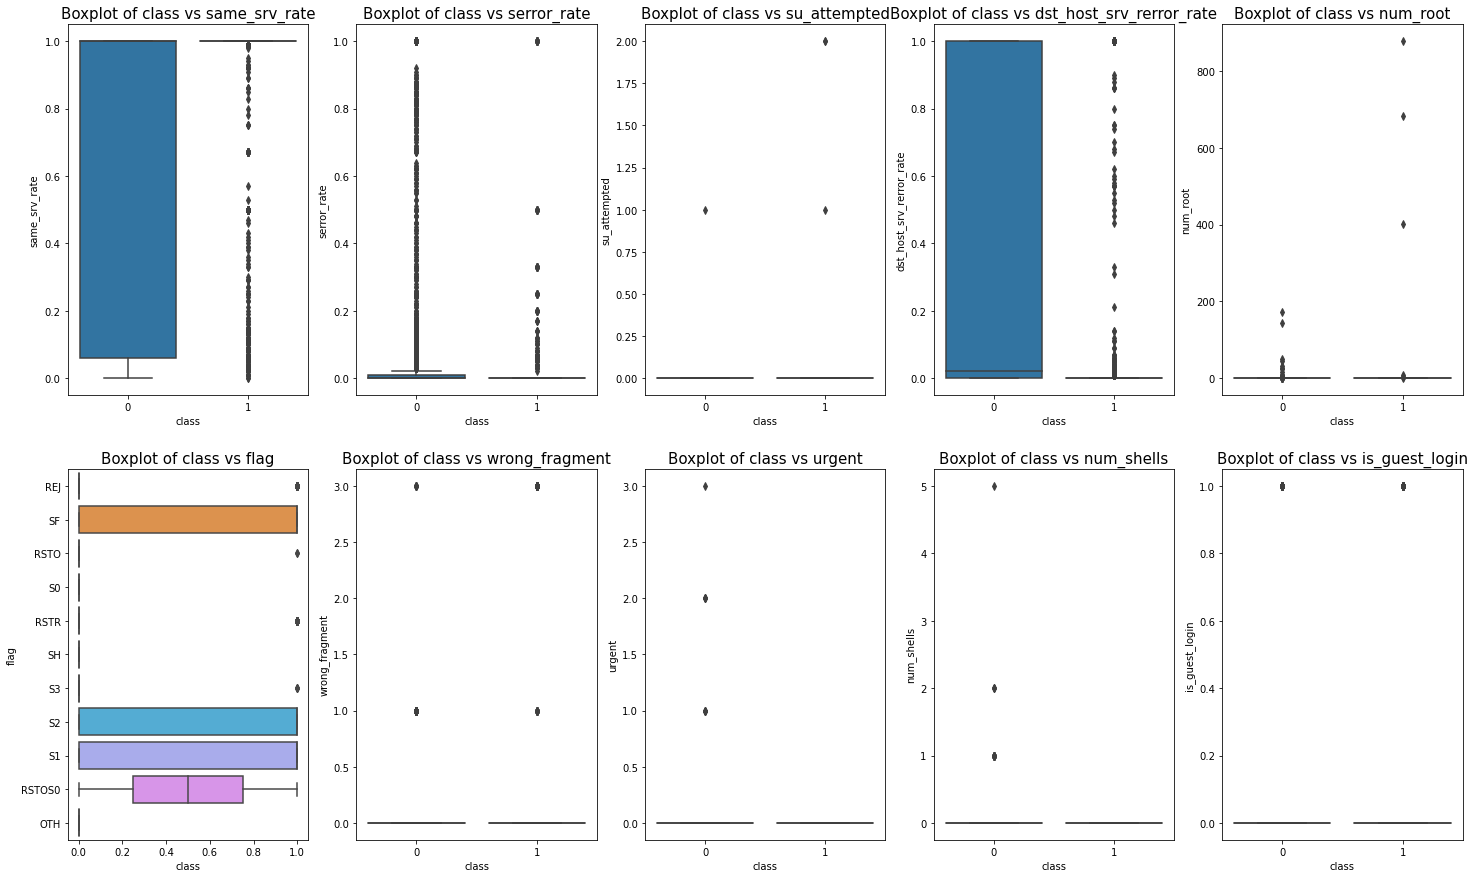

In [24]:
plt.figure(figsize=(25,15))
x_cols = ['same_srv_rate', 'serror_rate', 'su_attempted', 'dst_host_srv_rerror_rate', 'num_root',  'flag', 'wrong_fragment','urgent','num_shells','is_guest_login']
y_cols = ['class']
for i, col in enumerate(x_cols, start=1):
    
    plt.subplot(2,5,i)
    
    title_text = "Boxplot of class vs "+col
    plt.title(title_text, fontsize=15)
    
    sns.boxplot(x=signature_df['class'], y=signature_df[col])


<b1><font color='blue'> 4. Do the correlational analysis on the dataset. Provide a visualization for the 
same. Will this correlational analysis have an effect on feature selection that you 
will perform in the next step?
</font></b1>

The Pearson correlation coefficient measures the linear association between variables. 
Its value can be interpreted like so:

+1   - Complete positive correlation <br>
+0.8 - Strong positive correlation <br>
+0.6 - Moderate positive correlation <br>
0    - no correlation whatsoever <br>
-0.6 - Moderate negative correlation <br>
-0.8 - Strong negative correlation <br>
-1   - Complete negative correlation <br>

Incase, two features have very high correlation implies that they are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features. Based on this, the feature selection would be done.For example, rerror_rate and srv_rerror_rate have a positive correlation of 0.98, which mean that these features are highly correalted and hence one of them can be dropped during feature selection.

In [18]:
start_time=datetime.now()
correlation = signature_df.corr(method='pearson')

In [16]:
correlation
print("Correlation ", correlation)

Correlation                               duration  src_bytes  dst_bytes      land  \
duration                     1.000000   0.002673   0.078951 -0.002741   
src_bytes                    0.002673   1.000000   0.053634 -0.000388   
dst_bytes                    0.078951   0.053634   1.000000 -0.001708   
land                        -0.002741  -0.000388  -0.001708  1.000000   
wrong_fragment              -0.009193  -0.001247  -0.005726 -0.001042   
urgent                      -0.000048  -0.000333   0.017556 -0.000343   
hot                         -0.004688   0.002631   0.027913 -0.002001   
num_failed_logins           -0.021159  -0.003127  -0.011167 -0.002538   
logged_in                   -0.075685  -0.009632   0.091598 -0.015692   
num_compromised              0.095383  -0.000098   0.089808 -0.000291   
root_shell                   0.019846  -0.000861   0.054135 -0.000872   
su_attempted                 0.088308  -0.000050   0.071767 -0.000223   
num_root                     0.095269 

<AxesSubplot:>

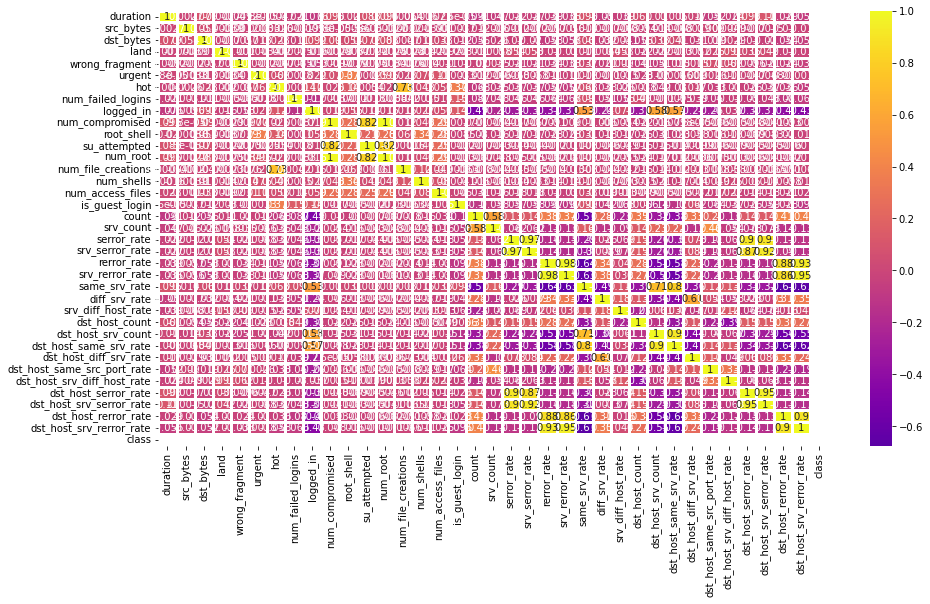

In [19]:
#Relationship Analysis 
#Corelation matric is table showing correlation coefficient
#sns.heatmap(correlation,cmap="plasma", center = 0,linewidths=2,annot=True)
#sns.heatmap(correlation,xticklabels=correlation.columns, yticklables=correlation.columns,annot=True)
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.heatmap(correlation, cmap="plasma",center = 0,linewidths=3,annot=True,
           xticklabels = correlation.columns, yticklabels = correlation.columns)


<b1><font color="Blue"> Chi Square test on various features of DataFrame </font></b1>

In [20]:
 #Chi sqr
#Chi-squared test: First, compute both the observation frequency and expected frequency.
from scipy import stats

In [161]:
# Test relationship Between the logged_in  and is_guest_login

login = pd.crosstab( signature_df.logged_in, signature_df.is_guest_login,margins=True)
print(login)
obsvsexp = np.append(login.iloc[0][0:2].values, login.iloc[1][0:2].values)
print("\nObservation set for logged_in vs is_guest_login ", obsvsexp, "\n")


is_guest_login      0    1    All
logged_in                        
0               12478   97  12575
1                9425  544   9969
All             21903  641  22544

Observation set for logged_in vs is_guest_login  [12478    97  9425   544] 



In [162]:
start_time=datetime.now()

row_sum = login.iloc[0:2,2].values
print("Row sum for logged_in  and is_guest_login error observation set ",row_sum)



Row sum for logged_in  and is_guest_login error observation set  [12575  9969]


In [164]:
exp = []
for j in range(2):
    print("Sum of each row :\n",row_sum)
    for val in login.iloc[2,0:2].values:
        exp.append(val * row_sum[j] / login.loc['All', 'All'])
print( "Observation set :", exp)


Sum of each row :
 [12575  9969]
Sum of each row :
 [12575  9969]
Observation set : [12217.451428317956, 357.548571682044, 9685.548571682044, 283.451428317956]


In [165]:
## print("(obsvsexp - exp)",((obsvsexp - exp)**2/exp).sum())
chi_sq_stats = ((obsvsexp - exp)**2/exp).sum()
print("chi_sq stats is : ",chi_sq_stats)

chi_sq stats is :  441.9255370142941


In [166]:
dof = (len(row_sum)-1)*(len(signature_df.iloc[1,0:2].values)-1)
print("difference bewteen Observed and Derived for logged_in and is_guest_login : ",dof)

difference bewteen Observed and Derived for logged_in and is_guest_login :  1


In [167]:
1 - stats.chi2.cdf(chi_sq_stats, dof)

#logged_in and is_guest_login is related 


0.0

<b1><font color='Blue'> Relation between features test </font></b1>

In [149]:
login = pd.crosstab(signature_df.logged_in, signature_df.is_guest_login, margins=True)
print(login)

obs = np.array([login.iloc[0][0:7].values,
                  login.iloc[1][0:7].values])
obs
stats.chi2_contingency(obs)[0:3]

is_guest_login      0    1    All
logged_in                        
0               12478   97  12575
1                9425  544   9969
All             21903  641  22544


(441.9255370142941, 1.0891530983846747e-96, 2)

In [150]:
alpha = 0.05
if stats.chi2_contingency(obs)[1] <= alpha:
    print("Dependent relationship between logged_in and is_guest_login")
else:
    print("Independent relationship between logged_in and is_guest_login ")
print("")

Dependent relationship between logged_in and is_guest_login



In [30]:
#Scipy Check -p
#wrong_fragment vs class 
classflag = pd.crosstab(signature_df["class"], signature_df["wrong_fragment"], margins=True)
print(classflag)

obs = np.array([classflag.iloc[0][0:2].values,
                  classflag.iloc[1][0:2].values])
obs
stats.chi2_contingency(obs)[0:2]

wrong_fragment      0   1   3    All
class                               
0               22444  55  45  22544
All             22444  55  45  22544


(0.0, 1.0)

In [31]:
alpha = 0.05
print(stats.chi2_contingency(obs)[1])
if stats.chi2_contingency(obs)[1] <= alpha:
    print("Dependent relationship between class and wrong_segment")
else:
    print("Independent relationship between class and wrong_segment ")
print("")

1.0
Independent relationship between class and wrong_segment 



In [32]:
#same_srv_rate vs dst_host_same_srv_rate 
samesrvrate = pd.crosstab(signature_df["same_srv_rate"], signature_df["dst_host_same_srv_rate"], margins=True)
samesrvrate


obs = np.array([samesrvrate.iloc[0][0:3].values,
               samesrvrate.iloc[1][0:3].values])
print(obs)
stats.chi2_contingency(obs)[0:3]
#p value is more so is_ped ?

[[742   1   0]
 [283 324  23]]


(543.9390678733268, 7.675950501339835e-119, 2)

In [33]:
alpha = 0.05
if stats.chi2_contingency(obs)[1] <= alpha:
    print("Dependent relationship between same_srv_rate and dst_host_same_srv_rate")
else:
    print("Independent relationship between same_srv_rate and dst_host_same_srv_rate ")
print("")

Dependent relationship between same_srv_rate and dst_host_same_srv_rate



In [89]:
#serror_rate  vs same_gender 
serrorrerror = pd.crosstab(signature_df.serror_rate , signature_df.dst_host_srv_rerror_rate, margins=True)
print(serrorrerror)

obs = np.array([serrorrerror.iloc[0][0:4].values,
                serrorrerror.iloc[1][0:4].values])
obs
stats.chi2_contingency(obs)[0:3]

dst_host_srv_rerror_rate    0.0  0.01  0.02  0.03  0.04  0.05  0.06  0.07  \
serror_rate                                                                 
0.0                       13376   363   254   227    95   120   107   102   
0.01                          3     0     0     0     0     0     0     0   
0.02                          3     0     0     0     0     0     0     0   
0.03                          7     0     0     0     0     0     0     0   
0.04                         10     0     0     0     0     0     0     0   
...                         ...   ...   ...   ...   ...   ...   ...   ...   
0.9                           1     0     0     0     0     0     0     0   
0.91                          0     0     0     0     0     0     0     0   
0.92                          1     0     0     0     0     0     0     0   
1.0                        1719    75    20     2     0     2     0     1   
All                       15293   444   275   229    95   127   110   107   

(0.18929173908477384, 0.9792991803390437, 3)

In [34]:
alpha = 0.05
print(stats.chi2_contingency(obs)[1] )
if stats.chi2_contingency(obs)[1] <= alpha:
    print("Dependent relationship between serror_rate  and dst_host_srv_rerror_rate")
else:
    print("Independent relationship between serror_rate  and dst_host_srv_rerror_rate ")
print("")

7.675950501339835e-119
Dependent relationship between serror_rate  and dst_host_srv_rerror_rate



In [93]:
#serror_rate   vs dst_host_serror_rate 
serrorrate = pd.crosstab(signature_df.serror_rate  , signature_df.dst_host_serror_rate, margins=True)
print(serrorrate)

obs = np.array([serrorrate.iloc[0][0:5].values,
                serrorrate.iloc[1][0:5].values])
obs
stats.chi2_contingency(obs)[0:3]

dst_host_serror_rate    0.0  0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  \
serror_rate                                                                   
0.0                   17743   488   224    48    38    26     9     4     6   
0.01                     40    31    16     0     0     0     1     0     0   
0.02                     31    32    18     3     2     8     0     0     0   
0.03                     16    59     7     8     4     6     2     0     0   
0.04                     17     7     6    10    26    13     6     5     0   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
0.9                       0     0     0     0     0     0     0     0     0   
0.91                      0     0     0     0     0     0     0     0     0   
0.92                      0     0     0     0     0     0     0     0     0   
1.0                       7     8     6     5     9     5     5     8     6   
All                   17926   660   314   113   130 

(559.7314348264549, 8.023465431162149e-120, 4)

In [35]:
alpha = 0.05
if stats.chi2_contingency(obs)[1] <= alpha:
    print("Dependent relationship between serror_rate   and dst_host_serror_rate")
else:
    print("Independent relationship between serror_rate   and dst_host_serror_rate ")
print("")

Dependent relationship between serror_rate   and dst_host_serror_rate



In [36]:
#su_attempted  vs num_root 
suattempted = pd.crosstab(signature_df.su_attempted , signature_df.num_root, margins=True)
print(suattempted)

obs = np.array([suattempted.iloc[0][0:6].values,
               suattempted.iloc[1][0:6].values])
obs
stats.chi2_contingency(obs)[0:3]

num_root          0   1  2  3  4  5  7  8  9  17  ...  26  31  45  51  145  \
su_attempted                                      ...                        
0             22495  14  4  7  6  1  1  2  1   1  ...   1   1   1   1    1   
1                 1   0  0  0  0  0  1  0  0   0  ...   0   0   0   0    0   
2                 0   0  0  0  0  0  0  0  0   0  ...   0   0   0   0    0   
All           22496  14  4  7  6  1  2  2  1   1  ...   1   1   1   1    1   

num_root      173  401  684  878    All  
su_attempted                             
0               1    1    0    0  22540  
1               0    0    0    0      2  
2               0    0    1    1      2  
All             1    1    1    1  22544  

[4 rows x 21 columns]


(0.0014225382520270757, 0.9999999959422242, 5)

In [100]:
alpha = 0.05
print(stats.chi2_contingency(obs)[1] )
if stats.chi2_contingency(obs)[1] <= alpha:
    print("Dependent relationship between su_attempted  and num_root")
else:
    print("Independent relationship between su_attempted  and num_root ")
print("")

0.9999999959422242
Independent relationship between su_attempted  and num_root 



In [103]:
# Test between src_bytes and  class

classbyte = pd.crosstab(signature_df.src_bytes, signature_df['class'], margins=True)
print(classbyte)

obs = np.array([classbyte.iloc[0][0:7].values,
                  classbyte.iloc[1][0:7].values])
obs
stats.chi2_contingency(obs)[0:3]

class          0    All
src_bytes              
0           7626   7626
1            473    473
2              1      1
5              9      9
6             17     17
...          ...    ...
3886954        1      1
6291668        1      1
31645608       1      1
62825648       1      1
All        22544  22544

[1150 rows x 2 columns]


(0.0, 1.0, 1)

In [104]:
alpha = 0.05
if stats.chi2_contingency(obs)[1] <= alpha:
    print("Dependent relationship between src_bytes and class")
else:
    print("Independent relationship between src_bytes and class ")
print("")

Independent relationship between src_bytes and class 



<b><center><font color='blue'> 2. Data Pre-processing and cleaning </font></center></b>

<b1><font color='blue'>1. Do the appropriate pre-processing of the data like identifying NULL or Missing 
Values if any, handling of outliers if present in the dataset, skewed data etc. 
Mention the pre-processing steps performed in the markdown cell. Explore a 
few latest data balancing tasks and its effect on model evaluation parameters.</font></b1>

In [19]:
#Check On nulls and determining the %
start_time=datetime.now()
print("Null Statistics on the entire Data set :\n",signature_df.isna().sum())
print("Null % Statistics on the entire Data set :\n",signature_df.isna().sum()/len(signature_df)*100)
later_time=datetime.now()
difference = later_time - start_time
print("End Time",datetime.now(),"\nTime Taken to read ", str(difference))

Null Statistics on the entire Data set :
 duration                        0
protocol_type                   0
service                         0
flag                            0
src_bytes                       0
dst_bytes                       0
land                            0
wrong_fragment                  0
urgent                          0
hot                             0
num_failed_logins               0
logged_in                       0
num_compromised                 0
root_shell                      0
su_attempted                    0
num_root                        0
num_file_creations              0
num_shells                      0
num_access_files                0
is_guest_login                  0
count                          18
srv_count                      13
serror_rate                     0
srv_serror_rate                 0
rerror_rate                     0
srv_rerror_rate                 0
same_srv_rate                   0
diff_srv_rate                   0
srv_di

In [20]:
#Preprocess for Missing values .count and srv_count by mean method
import numpy as np
start_time=datetime.now()
numeric = signature_df.select_dtypes(include=np.number)
numeric_columns = numeric.columns
print(numeric_columns)
signature_df[numeric_columns] = signature_df[numeric_columns].fillna(signature_df.mean())
signature_df.isna().sum()/len(signature_df)*100

#recheck for nulls again 

#Check On nulls and determining the %
print("Null Statistics on the entire Data set :\n",signature_df.isna().sum())
print("Null % Statistics on the entire Data set :\n",signature_df.isna().sum()/len(signature_df)*100)

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')
Null Statistics on the entire Data set :
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land  

<b1><font color='blue'> convert class feature to integer , normal=1 , anamoly=0</font></b1>

In [21]:
# Convert the class fro string t0 int 
signature_df['class'].str.strip()
signature_df['class'] = signature_df["class"].apply(lambda x : 1 if x=='normal' else 0 )
#signature_df = signature_df.assign(class_category=lambda x: 1 if x == 'normal' else 0)
signature_df.head()
signature_df[(signature_df['class'] == 1)]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1
5,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,1
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,1
8,0,tcp,http,SF,327,467,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.0,0.00,0.00,1
11,0,tcp,smtp,SF,616,330,0,0,0,0,...,129,0.51,0.03,0.00,0.00,0.00,0.0,0.33,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22533,0,tcp,http,SF,274,1623,0,0,0,0,...,255,1.00,0.00,0.01,0.04,0.00,0.0,0.00,0.00,1
22535,0,tcp,http,SF,280,6087,0,0,0,0,...,255,1.00,0.00,0.20,0.04,0.00,0.0,0.00,0.00,1
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,1
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,1


<b1><font color='blue'> 2. Apply the feature 
transformation techniques like Standardization, Normalization, etc. You are free 
to apply the appropriate transformations depending upon the structure and the complexity of your dataset. - 
MinMax Normalization on duration column as difference between min and max value for this column was more </font></b1>

In [22]:
#MinMax Normalization on duration column as difference between min and max value for this column was more  
from sklearn.preprocessing import MinMaxScaler
X = np.array(signature_df['duration']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
signature_df['duration'] = X_scaled.reshape(1,-1)[0]
signature_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.000000,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
1,0.000000,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
2,0.000035,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,1
3,0.000000,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,0
4,0.000017,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,0


In [23]:
# removing unwanted data set after chi and pearson test 

signature_drop_df= signature_df.drop(['src_bytes'],axis=1)
signature_drop_df= signature_drop_df.drop(['dst_host_serror_rate'],axis=1)
signature_drop_df= signature_drop_df.drop(['dst_host_same_srv_rate'],axis=1)
signature_drop_df= signature_drop_df.drop(['dst_bytes'],axis=1)
signature_drop_df= signature_drop_df.drop(['is_guest_login'],axis=1)
signature_drop_df.head()

,duration,protocol_type,service,flag,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.000000,tcp,private,REJ,0,0,0,0,0,0,...,0.00,255,10,0.06,0.00,0.00,0.0,1.00,1.00,0
1,0.000000,tcp,private,REJ,0,0,0,0,0,0,...,0.00,255,1,0.06,0.00,0.00,0.0,1.00,1.00,0
2,0.000035,tcp,ftp_data,SF,0,0,0,0,0,0,...,0.00,134,86,0.04,0.61,0.02,0.0,0.00,0.00,1
3,0.000000,icmp,eco_i,SF,0,0,0,0,0,0,...,1.00,3,57,0.00,1.00,0.28,0.0,0.00,0.00,0
4,0.000017,tcp,telnet,RSTO,0,0,0,0,0,0,...,0.75,29,86,0.17,0.03,0.02,0.0,0.83,0.71,0


<b><font color='Blue'><center>3. Model Building
    Building Predicting Models and Evaluating the model</center></font></b>

<b1><font color='Purple'>Building Predicting Models for dataset</font></b1>

<b1><font color='blue'> Case 1 Logistic regression 80-20 split</font></b1>

In [25]:
X=signature_drop_df[[ 'duration' ,'land' ,'wrong_fragment' ,'urgent' ,'hot' ,'num_failed_logins' ,'logged_in' ,'num_compromised' ,'root_shell' ,'su_attempted' ,'num_root' ,'num_file_creations' ,'num_shells' ,'num_access_files' ,'count' ,'srv_count' ,'serror_rate' ,'srv_serror_rate' ,'rerror_rate' ,'srv_rerror_rate' ,'same_srv_rate' ,'diff_srv_rate' ,
'srv_diff_host_rate' ,'dst_host_count' ,'dst_host_srv_count' ,'dst_host_diff_srv_rate' ,'dst_host_same_src_port_rate' ,'dst_host_srv_diff_host_rate' ,'dst_host_srv_serror_rate' ,'dst_host_rerror_rate' ,'dst_host_srv_rerror_rate' ]]
y=signature_drop_df['class']
print(X.shape)
print(y.shape)

(22544, 31)
(22544,)


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.02)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(22093, 31) (22093,)
(451, 31) (451,)


In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=20000)
mymodel=model.fit(X_train,y_train)

<b1><font color='blue'> 2. Explore k-fold cross validation
K fold cross validation for 80-20 split</font></b1>

In [28]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(10)
scores=cross_val_score(mymodel,X_train,y_train,scoring='r2',cv=10)
scores

array([0.45562685, 0.5036055 , 0.53682149, 0.48299756, 0.45530101,
       0.4700725 , 0.49407619, 0.54762287, 0.48299756, 0.53481679])

In [29]:
print(np.mean(scores))

0.4963938311398233


<b1><font color='blue'> Predicting the test dataset </font></b1>

In [30]:
#Test data 
#printing score on test data 
from sklearn.model_selection import cross_val_predict
pred=cross_val_predict(model,X_test,y_test)
pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [31]:
#10 cross validation 
scores_test=cross_val_score(model,X_test,y_test,cv=10)
scores_test

array([0.84782609, 0.86666667, 0.86666667, 0.84444444, 0.88888889,
       0.84444444, 0.97777778, 0.82222222, 0.86666667, 0.91111111])

<b1><font color='blue'>4. Explore the need of regularization and incorporate few relevant techniques for 
the problem statement
kfold validation score for 80-20 split</font><b1>

In [32]:
#average 
print(np.mean(scores_test))

0.8736714975845411


<b1><font color ='blue'>Regularization ridge and Lasso </font></b>

In [51]:
#Regular
from sklearn.metrics import mean_absolute_error
print("Train :",mean_absolute_error(y_train,model.predict(X_train)))
print("Test :",mean_absolute_error(y_test,model.predict(X_test)))

Train : 0.1231159190693885
Test : 0.13082039911308205


In [52]:
#Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
rr=Ridge()
rr.fit(X_train,y_train)
print("Train :",mean_absolute_error(y_train,rr.predict(X_train)))
print("Test :",mean_absolute_error(y_test,rr.predict(X_test)))

Train : 0.21346103860872004
Test : 0.21761271780449318


In [53]:
#lasso
from sklearn.linear_model import Lasso
ll=Lasso()
ll.fit(X_train,y_train)
print("Train :",mean_absolute_error(y_train,ll.predict(X_train)))
print("Test :",mean_absolute_error(y_test,ll.predict(X_test)))

Train : 0.2863653907575906
Test : 0.28915059862512194


In [33]:
def get_classification_metric(testy, probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(testy, probs)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    return fscore[ix]

<b1><font color='blue'> 4. Performance Evaluation - 1. Calculate f score ,accuracy ,precision and support for Logistic regression </font></b1>

f score: 0.8762376237623762
Confusion Matrix:
 [[224  30]
 [ 20 177]] 

Accuracy : 
 0.8891352549889135 

Classification report for Logistic Regression:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       254
           1       0.86      0.90      0.88       197

    accuracy                           0.89       451
   macro avg       0.89      0.89      0.89       451
weighted avg       0.89      0.89      0.89       451



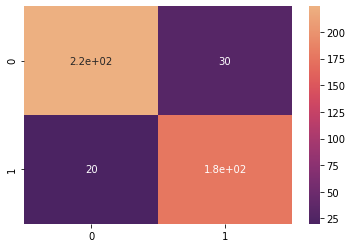

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

threshold =0.5

y_predGl=mymodel.predict(X_test)
y_predGBl = np.where(y_predGl > threshold, 1, 0)

fsGl=get_classification_metric(y_test,y_predGBl)

print("f score:",fsGl)
cmG = confusion_matrix(y_test, y_predGBl)
print("Confusion Matrix:\n",cmG,"\n")
print ("Accuracy : \n", accuracy_score(y_test, y_predGBl),"\n")

sns.heatmap(cmG,cmap="flare_r",annot=True)
print("Classification report for Logistic Regression:\n")
print("+"*60)
print(classification_report(y_test,y_predGBl))

<b1><font color='blue'> Case 2 : Logistic regression 10-90 split</font></b1>

In [34]:
#Case 2 :
##10-90 fit 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.90)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2254, 31) (2254,)
(20290, 31) (20290,)


In [35]:
model1090=LogisticRegression(max_iter = 2000)
mymodel1090=model1090.fit(X_train,y_train)

In [36]:
k_fold = KFold(10)
scores=cross_val_score(mymodel1090,X_train,y_train,scoring='r2',cv=10)
scores

array([0.46190476, 0.53365079, 0.58746032, 0.46190476, 0.55      ,
       0.496     , 0.424     , 0.46      , 0.532     , 0.442     ])

In [41]:
print(np.mean(scores))
#Predictig test 
pred=cross_val_predict(mymodel1090,X_test,y_test)
pred

0.49489206349206344


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([1, 0, 1, ..., 1, 1, 0])

In [42]:
#scoring test for case 2
scores_test=cross_val_score(mymodel1090,X_test,y_test,cv=10)
scores_test
print(np.mean(scores_test))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8759487432232627


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<b1><font color='blue'> 4. Explore the need of regularization and incorporate few relevant techniques for 
the problem statement
kfold validation score for 10-90 split</font><b1>

In [66]:
#Without Regularization

print("Train :",mean_absolute_error(y_train,model1090.predict(X_train)))
print("Test :",mean_absolute_error(y_test,model1090.predict(X_test)))

Train : 0.1344276841171251
Test : 0.1268112370625924


In [67]:
#Lasso - L1 Regularization

from sklearn.linear_model import Lasso
ll=Lasso()
ll.fit(X_train,y_train)
print("Train :",mean_absolute_error(y_train,ll.predict(X_train)))
print("Test :",mean_absolute_error(y_test,ll.predict(X_test)))

Train : 0.29054199896526134
Test : 0.28686150819369743


In [68]:
#Ridge - L2 Regularization

rr=Ridge()
rr.fit(X_train,y_train)
print("Train :",mean_absolute_error(y_train,rr.predict(X_train)))
print("Test :",mean_absolute_error(y_test,rr.predict(X_test)))

Train : 0.21726219514205744
Test : 0.23327119327041707


<b1><font color='blue'> 5. Compare models with and without regularization in a tabular format and justify the findings</font><b1>

In [2]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [4]:
from prettytable import PrettyTable

regTable = PrettyTable(["Type of Regularization", "Mean Absolute error (Train)", "Mean Absolute error (Test)"])
 
# Add rows
regTable.add_row(["Without Regularization", "0.134427684", "0.126811237"])
regTable.add_row(["L1 (Lasso) Regularization", "0.290541999", "0.286861508"])
regTable.add_row(["L2 (Ridge) Regularization", "0.217262195", "0.233271193"])
 
print(regTable)

+---------------------------+-----------------------------+----------------------------+
|   Type of Regularization  | Mean Absolute error (Train) | Mean Absolute error (Test) |
+---------------------------+-----------------------------+----------------------------+
|   Without Regularization  |         0.134427684         |        0.126811237         |
| L1 (Lasso) Regularization |         0.290541999         |        0.286861508         |
| L2 (Ridge) Regularization |         0.217262195         |        0.233271193         |
+---------------------------+-----------------------------+----------------------------+


From the above table, it can be seen that the mean absolute error values are lower in case of model without any regularization. When L1 and L2 regularizations are used, the mean absolute error values have increased when compared to the initial case. Therefore, when these regularization techniques are used the over fitting of the model is prevented. Thus making the model more efficient when it processes the testing data or real world data.

In [44]:
from sklearn.linear_model import RidgeCV
alphas=[1,1e3,1e6]
regressor=RidgeCV(alphas=alphas,store_cv_values=True)
regressor.fit(X_train,y_train)
cv_mse=np.mean(regressor.cv_values_,axis=0)
print(alphas)
print(cv_mse)

[1, 1000.0, 1000000.0]
[1.75078633 0.19209143 0.14114763]


<b1><font color="blue"> Modelling using customised function and dividing dataset based on Kfold </font></b1>

In [47]:
x_cols = ['duration' ,'land' ,'wrong_fragment' ,'urgent' ,'hot' ,'num_failed_logins' ,'logged_in' ,'num_compromised' ,'root_shell' ,'su_attempted' ,'num_root' ,'num_file_creations' ,'num_shells' ,'num_access_files' ,'count' ,'srv_count' ,'serror_rate' ,'srv_serror_rate' ,'rerror_rate' ,'srv_rerror_rate' ,'same_srv_rate' ,'diff_srv_rate' ,
'srv_diff_host_rate' ,'dst_host_count' ,'dst_host_srv_count' ,'dst_host_diff_srv_rate' ,'dst_host_same_src_port_rate' ,'dst_host_srv_diff_host_rate' ,'dst_host_srv_serror_rate' ,'dst_host_rerror_rate' ,'dst_host_srv_rerror_rate']
y_cols = ['class']

X = signature_drop_df[x_cols].copy()
Y = signature_drop_df[y_cols].copy()
Y = Y.to_numpy()

In [48]:
sc = StandardScaler()

X = sc.fit_transform(X)
X

array([[-0.15553409, -0.01762386, -0.05910394, ..., -0.3527496 ,
         1.97979091,  1.9291162 ],
       [-0.15553409, -0.01762386, -0.05910394, ..., -0.3527496 ,
         1.97979091,  1.9291162 ],
       [-0.15411277, -0.01762386, -0.05910394, ..., -0.3527496 ,
        -0.60271888, -0.56548308],
       ...,
       [-0.15553409, -0.01762386, -0.05910394, ..., -0.3527496 ,
        -0.4219432 , -0.39086113],
       [-0.15553409, -0.01762386, -0.05910394, ..., -0.3527496 ,
        -0.60271888, -0.56548308],
       [-0.15553409, -0.01762386, -0.05910394, ..., -0.3527496 ,
         0.53358543,  1.9291162 ]])

In [49]:
kf = KFold(n_splits=10)

In [54]:
model_cm = np.zeros((2,2))
for train_index, test_index in kf.split(X, Y):

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # Fit the model
    J, theta = grad_descent(X=X_train, Y=Y_train.ravel(), a=0.04, epochs=5000)
    
    # Predict using trained model
    pred = predict(X_test, theta)
    
    model_cm += conf_matrix(Y_test, pred)


<ipython-input-3-e12ffe4c5352>:18: RuntimeWarning: divide by zero encountered in log
  pred_0 = (1-Y)*np.log(1-h)
<ipython-input-3-e12ffe4c5352>:18: RuntimeWarning: invalid value encountered in multiply
  pred_0 = (1-Y)*np.log(1-h)


In [86]:
theta

array([-0.19951909, -0.00891308,  0.10135596, -0.30279703, -0.53210803,
       -0.32478312,  0.54349011,  0.42403207, -0.02149608,  0.2263127 ,
        0.18697636,  0.66114008, -0.11716173,  0.0338522 , -0.31198108,
        0.30680961,  0.08948842, -0.25902665, -0.02132291, -0.76349101,
       -0.27619917, -0.056765  , -0.09061393,  0.12856325, -0.90475109,
        0.61450543,  0.19092984, -0.53645761, -0.33701934, -0.58286483,
       -0.22923068, -0.07791568])

In [87]:
z_val = []
for i,val in enumerate(theta,start=1):
    z_val.append(str(round(val,2))+"*X"+str(i))
z_val = ' + '.join(z_val)

print("Logistic regression equation:")
print("1/(1 + e^("+z_val+") )")

Logistic regression equation:
1/(1 + e^(-0.2*X1 + -0.01*X2 + 0.1*X3 + -0.3*X4 + -0.53*X5 + -0.32*X6 + 0.54*X7 + 0.42*X8 + -0.02*X9 + 0.23*X10 + 0.19*X11 + 0.66*X12 + -0.12*X13 + 0.03*X14 + -0.31*X15 + 0.31*X16 + 0.09*X17 + -0.26*X18 + -0.02*X19 + -0.76*X20 + -0.28*X21 + -0.06*X22 + -0.09*X23 + 0.13*X24 + -0.9*X25 + 0.61*X26 + 0.19*X27 + -0.54*X28 + -0.34*X29 + -0.58*X30 + -0.23*X31 + -0.08*X32) )


<b1><font color='blue'> Accuracy of kfold division of dataset </font><b1>

In [88]:
###################################
## Confusion Matrix and Accuracy ##
###################################

print("Accuracy of Logistic Regression :", np.trace(model_cm)*100/np.sum(model_cm), "%")
print("Confusion Matrix for Logistic Regression : \n", model_cm)

Accuracy of Logistic Regression : 86.07611781405252 %
Confusion Matrix for Logistic Regression : 
 [[ 9087.  2515.]
 [  624. 10318.]]


<b1> <font color='blue'> 3. Model Building using MLE  </font></b1>

Maximum Likelihood Estimation involves treating the problem as an optimization or search problem, where we seek a set of parameters that results in the best fit for the joint probability of the data sample (X).The objective of Maximum Likelihood Estimation is to find the set of parameters (theta) that maximize the likelihood function, e.g. result in the largest likelihood value. It can be represented as below.

maximize L(X | theta)

For multiple observations, the probabilities for each of them is calculated and multiplied. To make this calculation more stable, logarithm of the same is considered so that the products become sum of probabilities.

sum i to n log(P(xi ; theta))

The attampt is to minimize the cost function.Therefore, the negative of the log-likelihood function is used, referred to generally as a Negative Log-Likelihood (NLL) function.

minimize -sum i to n log(P(xi ; theta))

In case of linear regression, the model is constrained to a line and involves finding a set of coefficients for the line that best fits the observed data.

<b1><font color='Blue'>
3. Model Building Case 1 80-20 split by  GradientBoostingClassifier model for predicting along with evaluation metrics</font></b1>

(22093, 32) (22093,)
(451, 32) (451,)
f score: 0.948509485094851
Confusion Matrix:
 [[257   5]
 [ 14 175]] 

Accuracy : 
 0.9578713968957872 

Classification report for GradientBoostingClassifier:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       262
           1       0.97      0.93      0.95       189

    accuracy                           0.96       451
   macro avg       0.96      0.95      0.96       451
weighted avg       0.96      0.96      0.96       451



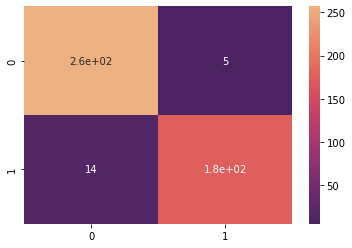

In [105]:
#predicting using XgBoost  for 80-20 split

from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.02)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

model.fit(X_train,y_train)
threshold =0.5
y_predG=model.predict(X_test)

y_predGB = np.where(y_predG > threshold, 1, 0)

fsG=get_classification_metric(y_test,y_predGB)

print("f score:",fsG)
cmG = confusion_matrix(y_test, y_predGB)
print("Confusion Matrix:\n",cmG,"\n")
print ("Accuracy : \n", accuracy_score(y_test, y_predGB),"\n")

sns.heatmap(cmG,cmap="flare_r",annot=True)
print("Classification report for GradientBoostingClassifier:\n")
print("+"*60)
print(classification_report(y_test,y_predGB))


<b1><font color='blue'>3. Model Building
Case 2 10-9 0 split by  : GradientBoostingClassifier model for predicting 10-90 split along with evaluation matrix</font></b1>

(2254, 32) (2254,)
(20290, 32) (20290,)
f score: 0.9486942454356367
Confusion Matrix:
 [[11192   339]
 [  549  8210]] 

Accuracy : 
 0.9562345983242977 

Classification report for GradientBoostingClassifier:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11531
           1       0.96      0.94      0.95      8759

    accuracy                           0.96     20290
   macro avg       0.96      0.95      0.96     20290
weighted avg       0.96      0.96      0.96     20290



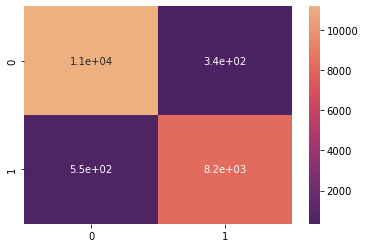

In [106]:
#predicting using XgBoost  for 10-90 split

from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.90)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

model.fit(X_train,y_train)
threshold =0.5
y_predG=model.predict(X_test)

y_predGB = np.where(y_predG > threshold, 1, 0)

fsG=get_classification_metric(y_test,y_predGB)

print("f score:",fsG)
cmG = confusion_matrix(y_test, y_predGB)
print("Confusion Matrix:\n",cmG,"\n")
print ("Accuracy : \n", accuracy_score(y_test, y_predGB),"\n")

sns.heatmap(cmG,cmap="flare_r",annot=True)
print("Classification report for GradientBoostingClassifier:\n")
print("+"*60)
print(classification_report(y_test,y_predGB))


<b> <font color ='blue'><center> 4. Performance Evaluation</center></font></b>
<b1> <font color ='blue'>1. Do the prediction for the test data and display the results for the inference. 
Calculate all the evaluation metrics and choose best for your model. Justify your 
answer</font></b1>

In [35]:
perfTable = PrettyTable(["ML Model", "Accuracy"])
 
# Add rows
perfTable.add_row(["Logistic Regression(With Kfold)", "88%"])
perfTable.add_row(["Gradient Boosting Classifier", "95%"])
 
print(perfTable)

+---------------------------------+----------+
|             ML Model            | Accuracy |
+---------------------------------+----------+
| Logistic Regression(With Kfold) |   88%    |
|   Gradient Boosting Classifier  |   95%    |
+---------------------------------+----------+


From the above table it is evident that ML prediction model buid using Gradient Boosting Classifier has better accuracy whne compared to the one using logistic regression. The reason for Gradient Boosting classifier giving better accuracy is beacuse it is a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.

<b1> <font color ='blue'>2. Comment on underfitting/overfitting/just right model. Justify your comment</font></b1>

In [37]:
regTable = PrettyTable(["Type of Regularization", "Mean Absolute error (Train)", "Mean Absolute error (Test)"])
 
# Add rows
regTable.add_row(["L2 (Ridge) Regularization", "0.217262195", "0.233271193"])
 
print(regTable)

+---------------------------+-----------------------------+----------------------------+
|   Type of Regularization  | Mean Absolute error (Train) | Mean Absolute error (Test) |
+---------------------------+-----------------------------+----------------------------+
| L2 (Ridge) Regularization |         0.217262195         |        0.233271193         |
+---------------------------+-----------------------------+----------------------------+


The above table has the mean absolute error values calculated using L2 (Ridge) Regularization using Logistic Regression. It can be observed that the training error and the testing error are close to each other and the training error is slightly lower than the testing error. Hence, it can be said that the model is just right.